# III. Model Selection
## Assignment 2
### Model Selection on Climate Change on Crop

We create frame different types of machine learning tasks:
- **Classification**: Classifying the type of **Extreme Weather Event** or **Soil Health** levels based on weather conditions.
- **Clustering**: Grouping similar data points based on conditions like **Temperature**, **CO2 Levels**, and **Precipitation**.
- How the Crop Disease Incidence	Water Availability	Food Security	Economic Impact will be affected by Extreme Weather Events

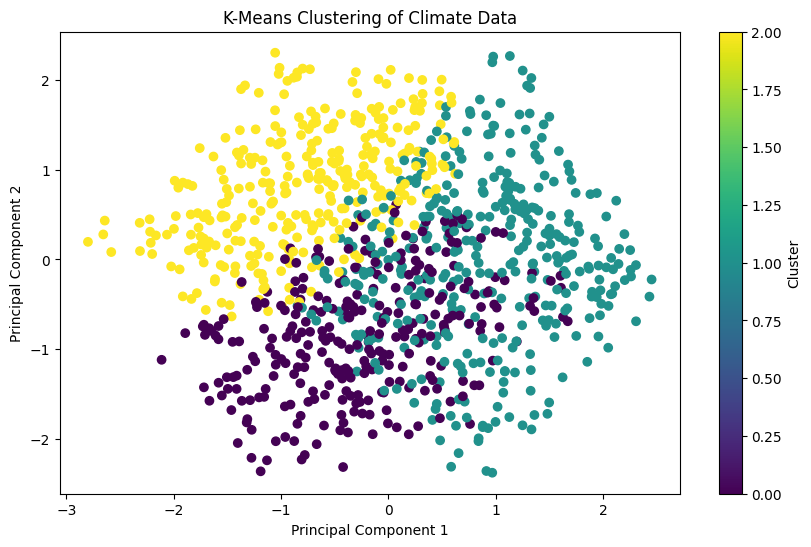

   Temperature  Precipitation  CO2 Levels  Crop Yield  Soil Health  \
0            7             59         329         483           10   
1           39             20         426         679            8   
2           18             46         403         587            5   
3            9             91         356         220            5   
4           35             12         325         538            1   

  Extreme Weather Events Crop Disease Incidence Water Availability  \
0                Drought                    Low               High   
1               Heatwave                   High                Low   
2                  Flood                    Low             Medium   
3               Heatwave                 Medium             Medium   
4                  Storm                 Medium             Medium   

  Food Security Economic Impact  Cluster  
0           Low            High        0  
1          High             Low        1  
2           Low          Medi

In [102]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Load the dataset
df = pd.read_csv('processed_climate_change_data.csv')

# Step 2: Select features for clustering
features = ['Temperature', 'CO2 Levels', 'Precipitation']
X = df[features]

# Step 3: Normalize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Step 5: Add the cluster labels to the original DataFrame
df['Cluster'] = labels

# Step 6: Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Climate Data')
plt.colorbar(label='Cluster')
plt.show()

# Display the first few rows of the DataFrame with cluster labels
print(df.head())

Silhouette Score: 0.24377925213258442
Homogeneity Score: 0.0036858324297444713
Completeness Score: 0.00467155998320423


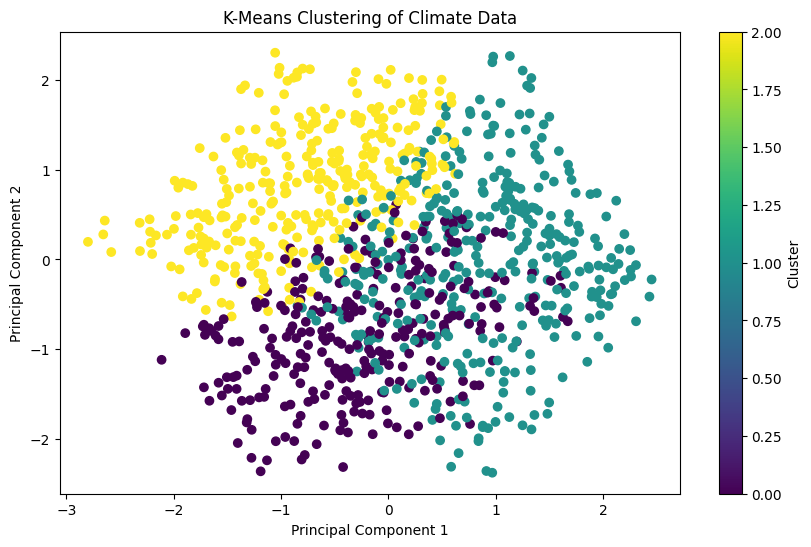

   Temperature  Precipitation  CO2 Levels  Crop Yield  Soil Health  \
0            7             59         329         483           10   
1           39             20         426         679            8   
2           18             46         403         587            5   
3            9             91         356         220            5   
4           35             12         325         538            1   

  Extreme Weather Events Crop Disease Incidence Water Availability  \
0                Drought                    Low               High   
1               Heatwave                   High                Low   
2                  Flood                    Low             Medium   
3               Heatwave                 Medium             Medium   
4                  Storm                 Medium             Medium   

  Food Security Economic Impact  Cluster  
0           Low            High        0  
1          High             Low        1  
2           Low          Medi

In [104]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# Step 1: Load the dataset
df = pd.read_csv('processed_climate_change_data.csv')

# Step 2: Select features for clustering
features = ['Temperature', 'CO2 Levels', 'Precipitation']
X = df[features]

# Step 3: Normalize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Step 5: Add the cluster labels to the original DataFrame
df['Cluster'] = labels

# Step 6: Calculate Clustering Scores
silhouette_avg = silhouette_score(X_scaled, labels)
homogeneity = homogeneity_score(df['Extreme Weather Events'], labels)  
completeness = completeness_score(df['Extreme Weather Events'], labels) 

print(f"Silhouette Score: {silhouette_avg}")
print(f"Homogeneity Score: {homogeneity}")
print(f"Completeness Score: {completeness}")

# Step 7: Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Climate Data')
plt.colorbar(label='Cluster')
plt.show()

# Display the first few rows of the DataFrame with cluster labels
print(df.head())